# CALIFORNIA ROAD ACCIDENT 

**mySQL to Python connection and Data VISUALIZATION**

In [4]:
from getpass import getpass
from mysql.connector import connect, Error

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [19]:
results_of_sp=[];
try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
        database="cal_road_accident"
    ) as connection:


        with connection.cursor() as cursor:
            cursor.callproc('Compare_Collisions_2019_2020');
            for result in cursor.stored_results():
                results_of_sp=(result.fetchall())
            
except Error as e:
    print("Error while connecting to MySql", e)
finally:
        cursor.close()
        connection.close()

Enter username: root
Enter password: ········


In [21]:

Compare_Collisions_2019_2020 =pd.DataFrame(results_of_sp, columns =['MonthYear','CollisionSeverity','TotalCount'])


Compare_Collisions_2019_2020_Fatal= Compare_Collisions_2019_2020[Compare_Collisions_2019_2020['CollisionSeverity'] =='Fatal'] ;


Compare_Collisions_2019_2020_Non_Fatal= Compare_Collisions_2019_2020[Compare_Collisions_2019_2020['CollisionSeverity'] =='Non Fatal'] ;


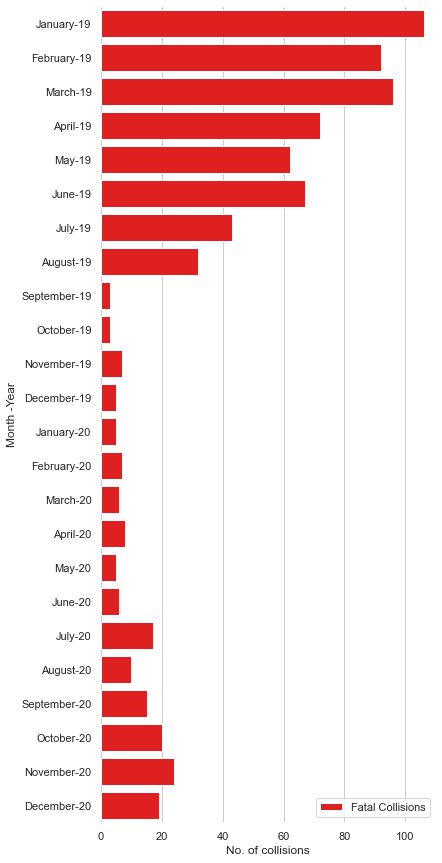

In [22]:

sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total no of fatal collisions in 2019-2020
sns.set_color_codes("pastel")
sns.barplot(x="TotalCount", y="MonthYear", data=Compare_Collisions_2019_2020_Fatal,
            label="Fatal Collisions", color="red")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( xlim=(0, 110) ,ylabel="Month -Year",
       xlabel="No. of collisions")
sns.despine(left=True, bottom=True)

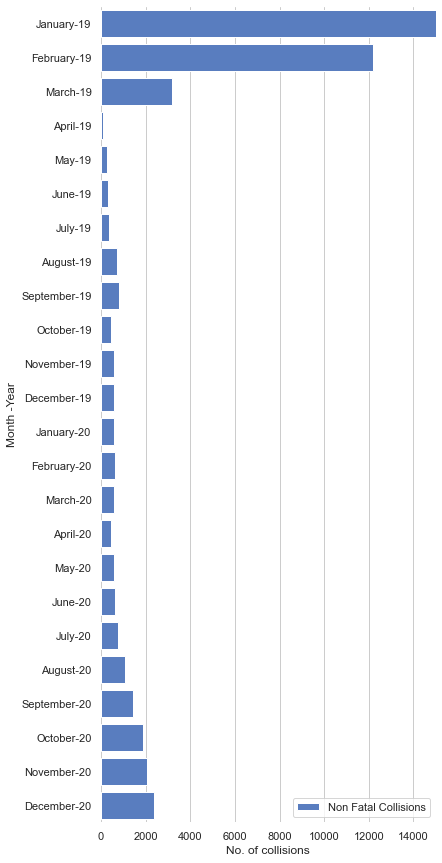

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))


# Plot the total no of fatal collisions in 2019-2020
sns.set_color_codes("muted")
sns.barplot(x="TotalCount", y="MonthYear", data=Compare_Collisions_2019_2020_Non_Fatal,
            label="Non Fatal Collisions", color="b")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set( xlim=(0, 15000) ,ylabel="Month -Year",
       xlabel="No. of collisions")
sns.despine(left=True, bottom=True)

**Here we are querying SQL commands via python to select Select victims involved and their sex, age, safety equipments involved column required for our Data Visualisation**

In [24]:
try:
    with connect(
        host="localhost",
        user=input("Enter username: "),
        password=getpass("Enter password: "),
        database="cal_road_accident"
    ) as connection:
        show_table_query = (" select party_age, party_sex, at_fault from parties where at_fault = 1;")
        with connection.cursor() as cursor:
            cursor.execute(show_table_query)
            result = cursor.fetchall();

            print(type(result));
except Error as e:
    print("Error while connecting to MySql", e)
finally:
        cursor.close()
        connection.close()

Enter username: root
Enter password: ········
<class 'list'>


In [25]:
data =pd.DataFrame(result, columns =['party_age','party_sex', 'at_fault'])

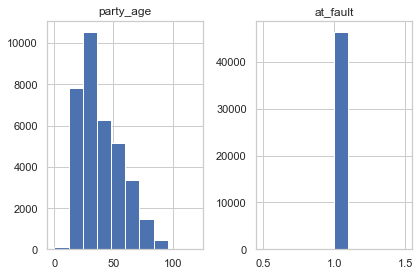

In [26]:
data.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show() 

**The above Grapgh depitcs a typical Histogram, In this Data Visualisation we are trying to explain which gender is at fault of the collision and their age as well.** 
**A detailed analysis will be given with a boxplot below**

In [27]:
class_frequency = data.value_counts()


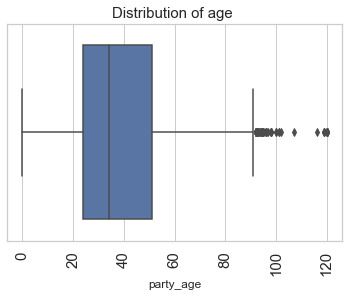

In [28]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")
sns.boxplot(data['party_age'])

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of age ', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**The above Boxplot gives us a pictorial distribution of the Age, It is clear from this that the mean age is around 35, and max age is around 120** 

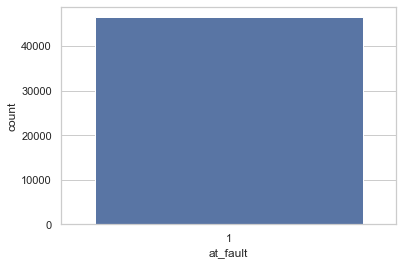

In [29]:

sns.countplot(x='at_fault',data=data);

**Plotting a countplot to find the number of people at fault at a collision in the State Of California, the total count is  around 45000**

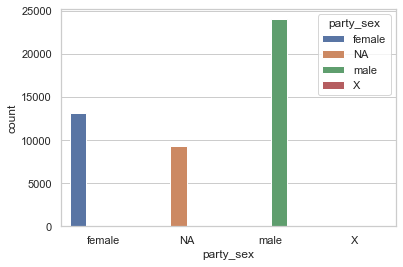

In [30]:
sns.countplot(x='party_sex',hue='party_sex',data=data);

**The above graph gives a pictorial description on the total count divided by the gender (Male, Female), NA being gender not specified in the Data we used for this project.** 
**It is clear  from the countplot that we can infer that the total number of Males are greater than the Total number of females.**

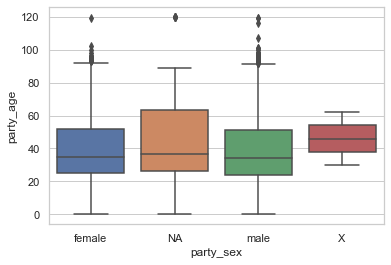

In [31]:
sns.boxplot(data=data, x='party_sex', y='party_age');

**The above boxplot gives us an analysis based on the gender and their age.**


**Futher analysis done below**

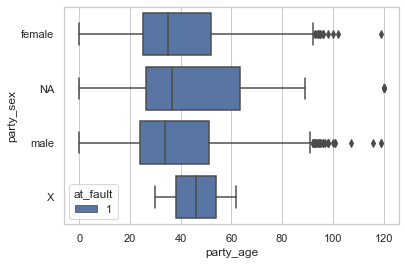

In [32]:
sns.boxplot(data=data, x='party_age', y='party_sex', hue ='at_fault');

**The Above Boxplot is the required Data Analysis. Here we can infer which gender is at fault for the collision, and from the earlier graph above we have concluded that the total number of Males is more than the total number of  the Females. From this graph we can say that the mean age for Females at fault is around 37 and the mean age for Male is around 35. X and NA are  unknown values which means gender or age of that party has not been specified.** 

